# Intrduction to scikit-learn (sklearn)
Demostration of the most useful functions of scikit learn library

What's we're going to cover : 

0. An end-to-end Scikit-Learn workflow
1. Get the data ready 
2. Choose the right estimator/algorithme for our problems
3. Fit the model/algorithme and use it to make predictions on our data
4. Evaluating a model 
5. Improve a model
6. Save and load a trained model
7. Putting it all together

## 0. An end-to-end scikit-learn workflow

In [1]:
whatsWerecovering = [
"0. An end-to-end Scikit-Learn workflow",
"1. Get the data ready ",
"2. Choose the right estimator/algorithm for our problems",
"3. Fit rh model/algorithme and use it to make predictions on our data",
"4. Evaluating a model" ,
"5. Improve a model",
"6. Save and load a trained model",
"7. Putting it all together"]

In [2]:
whatsWerecovering

['0. An end-to-end Scikit-Learn workflow',
 '1. Get the data ready ',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit rh model/algorithme and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together']

In [3]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [4]:
import warnings 
warnings.filterwarnings("ignore")

In [5]:
# 1. Get the data ready 
import pandas as pd
heartDisease = pd.read_csv('/home/rayani00/Bureau/python/MLPerso/zero-to-mastery-ml-master/data/heart-disease.csv')
heartDisease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
## To get the target in function of others attributes
# Create X (features matrix)
X = heartDisease.drop("target", axis=1)

# Create y (labels)
y = heartDisease["target"]


In [7]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We'ell keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
# 3. Fit the model to the training data

from sklearn.model_selection import train_test_split
# train_test_split is an algorithm that splits data

# test_size means that 80% of data 
# Will be used for training
# 20% wille be used for testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [9]:
# We have to fit the data model we created
clf.fit(X_train,y_train);

In [10]:
# Make a prediction 
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0])

In [11]:
y_test

105    1
115    1
285    0
146    1
130    1
      ..
265    0
161    1
21     1
95     1
202    0
Name: target, Length: 61, dtype: int64

In [12]:
# 4. Evaluate the model on the trainig data and the test data
clf.score(X_train, y_train)

1.0

In [13]:
clf.score(X_test, y_test)

0.8360655737704918

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [15]:
confusion_matrix(y_test, y_preds)

array([[21,  6],
       [ 4, 30]])

In [16]:
accuracy_score(y_test, y_preds)

0.8360655737704918

In [17]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range (10, 100, 10) : 
    print(f'Trying model with {i} estimators ..')
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f'Model accuracy on test set : {clf.score(X_test, y_test) * 100}')
    print('-----------')

Trying model with 10 estimators ..
Model accuracy on test set : 83.60655737704919
-----------
Trying model with 20 estimators ..
Model accuracy on test set : 83.60655737704919
-----------
Trying model with 30 estimators ..
Model accuracy on test set : 86.88524590163934
-----------
Trying model with 40 estimators ..
Model accuracy on test set : 85.24590163934425
-----------
Trying model with 50 estimators ..
Model accuracy on test set : 86.88524590163934
-----------
Trying model with 60 estimators ..
Model accuracy on test set : 86.88524590163934
-----------
Trying model with 70 estimators ..
Model accuracy on test set : 85.24590163934425
-----------
Trying model with 80 estimators ..
Model accuracy on test set : 86.88524590163934
-----------
Trying model with 90 estimators ..
Model accuracy on test set : 83.60655737704919
-----------


In [18]:
# 6. Save a model and load it
import pickle
pickle.dump(clf,open("random_forest_model_1.pkl","wb"))

In [19]:
loadedModel = pickle.load(open("random_forest_model_1.pkl","rb"))
loadedModel.score(X_test,y_test)

0.8360655737704918

In [20]:
import sklearn
sklearn.show_versions()


System:
    python: 3.8.5 (default, Sep  4 2020, 07:30:14)  [GCC 7.3.0]
executable: /home/rayani00/anaconda3/bin/python
   machine: Linux-5.11.0-37-generic-x86_64-with-glibc2.10

Python dependencies:
          pip: 21.1
   setuptools: 50.3.1.post20201107
      sklearn: 0.24.1
        numpy: 1.19.2
        scipy: 1.6.1
       Cython: 0.29.21
       pandas: 1.1.3
   matplotlib: 3.3.4
       joblib: 1.0.1
threadpoolctl: 2.1.0

Built with OpenMP: True


##  1- Getting our data ready to be used with machine learning
    Three main things we have to do  : 
        1. Spliting the data into features and labels (usually 'x' & 'y')
        2. Filling (also called imputing) or disregarding missing values 
        3. Converting non-numerical values into numerical values (also called feature encoding)

In [21]:
heartDisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# Get the features 
# axis = 1 : column axis
# axis = 0 : rows axis 
X = heartDisease.drop("target",axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
# Get the labels
y = heartDisease.target
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [24]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split 

In [25]:
# It returns 4 arrays
# test_size is the size of the data we want to test 
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

##### As we can see 80% of the heart_disease rows go to our training model, and 20% goes to our test model 

## 1.1 Make sure it's all numerical 

In [27]:
car_sales = pd.read_csv("/home/rayani00/Bureau/python/MLPerso/zero-to-mastery-ml-master/data/car-sales-extended.csv")

In [28]:
car_sales.head

<bound method NDFrame.head of        Make Colour  Odometer (KM)  Doors  Price
0     Honda  White          35431      4  15323
1       BMW   Blue         192714      5  19943
2     Honda  White          84714      4  28343
3    Toyota  White         154365      4  13434
4    Nissan   Blue         181577      3  14043
..      ...    ...            ...    ...    ...
995  Toyota  Black          35820      4  32042
996  Nissan  White         155144      3   5716
997  Nissan   Blue          66604      4  31570
998   Honda  White         215883      4   4001
999  Toyota   Blue         248360      4  12732

[1000 rows x 5 columns]>

In [29]:
# Split into X and y
X =  car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test data 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [30]:
# Build machine learning model 
# Regressor predict a number

from sklearn.ensemble import RandomForestRegressor 
model = RandomForestRegressor()
""" model.fit(X_train,y_train)
model.score(X_test, y_test) """


' model.fit(X_train,y_train)\nmodel.score(X_test, y_test) '

In [31]:
X.head

<bound method NDFrame.head of        Make Colour  Odometer (KM)  Doors
0     Honda  White          35431      4
1       BMW   Blue         192714      5
2     Honda  White          84714      4
3    Toyota  White         154365      4
4    Nissan   Blue         181577      3
..      ...    ...            ...    ...
995  Toyota  Black          35820      4
996  Nissan  White         155144      3
997  Nissan   Blue          66604      4
998   Honda  White         215883      4
999  Toyota   Blue         248360      4

[1000 rows x 4 columns]>

In [32]:
# Turn the categorical features into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

categorical_features = ["Make", "Colour", "Doors"]
# One hot is the method we'll use in this case
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [33]:
# Let' put this data into a datafranme 
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [34]:
# We can also use dummies in pandas
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [35]:
# Let's refit the model 
np.random.seed(11)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.2941031433819311

## 1.2 How to deal with missing values
1. Fille them with some values (Also called imputation)
2. Remove the rows that contains missing values

In [36]:
car_sales_missing = pd.read_csv("/home/rayani00/Bureau/python/MLPerso/zero-to-mastery-ml-master/data/car-sales-extended-missing-data.csv")

In [37]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [38]:
# Let's create X and y 
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [39]:
# Turn the categorical features into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

categorical_features = ["Make", "Colour", "Doors"]
# One hot is the method we'll use in this case
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

### Option 1  : Fill missing data with pandas

In [40]:
# Fill the "Make" column 
car_sales_missing["Make"].fillna("Missing", inplace=True)

# Fill the "Colour" column 
car_sales_missing["Colour"].fillna("Missing", inplace=True)

# Fill the "Odometer (KM)" column 
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column 
car_sales_missing["Doors"].fillna(4, inplace=True)

In [41]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,Missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [42]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [43]:
len(car_sales_missing)

950

##### After cleaning the data, let's test a model on it ! 

In [44]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [45]:
# Turn the categorical features into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

categorical_features = ["Make", "Colour", "Doors"]
# One hot is the method we'll use in this case
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0,4001.0


### Option 2 : Fill missing values with scikit-learn

In [46]:
car_sales_missing = pd.read_csv("/home/rayani00/Bureau/python/MLPerso/zero-to-mastery-ml-master/data/car-sales-extended-missing-data.csv")

In [47]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [48]:
# Drop the rows with no labels (Price column)
car_sales_missing.dropna(subset=["Price"], inplace=True)

In [49]:
# Split into X & y (Turn the data into label and features)
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing.Price

In [50]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with missing and numerical with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="Missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer =  SimpleImputer(strategy="mean")

# Define columns 
cat_features = ["Make", "Colour"]
num_featues = ["Odometer (KM)"]
door_features = ["Doors"]

# Create an imputer (Something that automatically fills missing values)
imputer =  ColumnTransformer ([
    ("cat_imputer", cat_imputer, cat_features),
    ("num_imputer", num_imputer, num_featues),
    ("door_imputer", door_imputer, door_features)
])

# Transform the data 
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 35431.0, 4.0],
       ['BMW', 'Blue', 192714.0, 5.0],
       ['Honda', 'White', 84714.0, 4.0],
       ...,
       ['Nissan', 'Blue', 66604.0, 4.0],
       ['Honda', 'White', 215883.0, 4.0],
       ['Toyota', 'Blue', 248360.0, 4.0]], dtype=object)

In [51]:
car_sales_filled = pd.DataFrame(filled_X,
                                columns=["Make", "Colour", "Odomter (KM)", "Doors"])

In [52]:
car_sales_filled.head()

,Make,Colour,Odomter (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [53]:
car_sales_filled.isna().sum()

Make            0
Colour          0
Odomter (KM)    0
Doors           0
dtype: int64

In [54]:
# Turn the categorical features into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

categorical_features = ["Make", "Colour", "Doors"]
# One hot is the method we'll use in this case
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
pd.DataFrame(transformed_X)

,0
0,"(0, 1)\t1.0\n (0, 10)\t1.0\n (0, 12)\t1.0\..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 10)\t1.0\n (0, 12)\t1.0\..."
3,"(0, 4)\t1.0\n (0, 10)\t1.0\n (0, 12)\t1.0\..."
4,"(0, 3)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."
...,...
945,"(0, 4)\t1.0\n (0, 5)\t1.0\n (0, 12)\t1.0\n..."
946,"(0, 2)\t1.0\n (0, 10)\t1.0\n (0, 11)\t1.0\..."
947,"(0, 3)\t1.0\n (0, 6)\t1.0\n (0, 12)\t1.0\n..."
948,"(0, 1)\t1.0\n (0, 10)\t1.0\n (0, 12)\t1.0\..."


In [55]:
# New we've got our data as numbers and no missing values 
# Let's fit a model
np.random.seed(11)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.19185637276055656

## 2. Choosing the right estimator/algorithm for our problem

Scikit-Learn uses estimator as another term for machine learning model or algorithm

* Classification : predicting whether a sample is one thing or another
* Regression : predicting a number 


### 2.1 Picking a machine learning model for a regression problem

In [56]:
# Import Boston housing dataset 
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [57]:
# Turn it into pandas data_frame
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"]=pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [58]:
# How many samples do we have ? 
len (boston_df)

506

In [59]:
# Let's try the Ridge regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(18)

# Create the data 
X = boston_df.drop("target", axis=1)
y = boston_df.target

# Split the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instaciate the model
model = Ridge()
model.fit(X_train, y_train)

# Check the score 
model.score(X_test, y_test)

0.6886281562229689

In [60]:
# Let's try Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(18)

# Create the data 
X = boston_df.drop("target", axis=1)
y = boston_df.target

# Split the data into Test and Train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instanciate the model that we gonna use
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

# Check the score that we got
rf.score(X_test, y_test)

0.8951955888285864

### 2.2 Choosig an estimator model for a classification problem

In [61]:
# Import the data
heart_disease = pd.read_csv("/home/rayani00/Bureau/python/MLPerso/zero-to-mastery-ml-master/data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [62]:
# How many samples do we have ? 
len(heart_disease)

303

after consulting the map it says to try 'LinearSVC' 

In [63]:
# Import LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(6)

# Create the Data 
X = heart_disease.drop("target", axis=1)
y = heart_disease.target

# Split the data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instanciate the model
clf = LinearSVC()

# Train the model
clf.fit(X_train, y_train)

# Get the score of the model
clf.score(X_test, y_test)


0.639344262295082

In [64]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [65]:
# Try the RandomForestClassifier estimator class
# Import RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(6)

# Create the Data 
X = heart_disease.drop("target", axis=1)
y = heart_disease.target

# Split the data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instanciate the model 
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data (Training machine learning model)
clf.fit(X_train, y_train)

# Get the score of the model (Use the patterns the model has learned)
clf.score(X_test, y_test)

0.8032786885245902

Tidbit:

1 - If you have structured data, used ensemble methods

2 - If you have unstructured data, use deep learning or transfer learning

## 3. Fit the model/algorithm on our data and use it to make predictions 
### 3.1 Fitting the model to the data
* "X" : Features, feature variables, data
* "y" : Labels, targets, target variables

### 3.2 Make predictions using a machine learning model
2 ways to make predictions : 
  * 'predict()'
  * 'predict_proba()'

In [66]:
# Use a trained model to make predictions 
""" clf.predict(np.array([1, 7, 8,3, 4])) # doesn't work .. """

" clf.predict(np.array([1, 7, 8,3, 4])) # doesn't work .. "

In [67]:
X_test.shape

(61, 13)

In [68]:
y_test.shape

(61,)

In [69]:
clf.predict(X_test)

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [70]:
# A way to calculate the accuracy
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8032786885245902

In [71]:
# Check the accuracy 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8032786885245902

#### Make predictions using predic_proba()

In [72]:
# predict_proba() returns probabilities of a classification label 
clf.predict_proba(X_test[:5])

array([[0.64, 0.36],
       [0.21, 0.79],
       [0.21, 0.79],
       [0.77, 0.23],
       [0.61, 0.39]])

'predict()' can be used for regression models


In [73]:
from sklearn.datasets import load_boston
boston = load_boston()
# Turn it into pandas data_frame
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"]=pd.Series(boston["target"])

In [74]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [75]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(11)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df.target

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instanciate and fit mode
model = RandomForestRegressor().fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)


In [76]:
# These are the predictions
y_preds[:10]

array([21.077, 14.636, 27.153, 34.671,  8.195, 13.741, 20.749,  8.369,
       45.462, 24.673])

In [77]:
# This is the truth
np.array(y_test[:10])

array([23.4,  8.1, 22. , 15. , 10.4, 14.9, 20.3,  8.4, 46. , 29.1])

In [78]:
# Let's compare the predictions to the truth
# The prediction will be that far away of the true result
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.7817745098039213

## 4. Evaluating a machine learning model

three ways to evalute Scikit-Learn models and estimators : 

1. Estimator 'score' method
2. The 'scoring' parameter
3. Problem-specific metric functions 

### 4.1 Evaluating a mode using the score method

In [79]:
from sklearn.ensemble import RandomForestClassifier 
# Import the data
heart_disease = pd.read_csv("/home/rayani00/Bureau/python/MLPerso/zero-to-mastery-ml-master/data/heart-disease.csv")

# Set up a random seed
np.random.seed(11)

# Create the data 
X = heart_disease.drop("target", axis=1)
y = heart_disease.target

# Split the data into train and test samples 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instanciate and fit the model
clf = RandomForestClassifier().fit(X_train, y_train)

In [80]:
clf.score(X_test, y_test)

0.8032786885245902

Let's do the same but for regression 

In [81]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(11)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df.target

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instanciate and fit mode
model = RandomForestRegressor().fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [82]:
model.score(X_test, y_test)

0.7653647106582748

### 4.2 Evaluating a model using scoring parameter

In [83]:
from sklearn.ensemble import RandomForestClassifier 
# Import the data
heart_disease = pd.read_csv("/home/rayani00/Bureau/python/MLPerso/zero-to-mastery-ml-master/data/heart-disease.csv")

# Set up a random seed
np.random.seed(11)

# Create the data 
X = heart_disease.drop("target", axis=1)
y = heart_disease.target

# Split the data into train and test samples 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instanciate and fit the model
clf = RandomForestClassifier().fit(X_train, y_train)

In [84]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, cv=15)

array([0.9047619 , 0.85714286, 0.80952381, 0.8       , 0.95      ,
       0.95      , 0.85      , 0.9       , 0.7       , 0.9       ,
       0.75      , 0.85      , 0.7       , 0.8       , 0.8       ])

In [85]:
np.random.seed(11)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two 
clf_single_score, clf_cross_val_score

(0.8032786885245902, 0.8150819672131148)

In [86]:
# Default scoring parameter of classifier = mean accuracy
clf.score(X_test, y_test)

0.8032786885245902

In [87]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.85245902, 0.90163934, 0.81967213, 0.8       , 0.76666667])

### Classification model evaluation metrics

1. Accuracy 
2. Area under ROC curve 
3. Confusion matrix
4. classification report 

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Set un a seed
np.random.seed(11)

# Create our data 
X = heartDisease.drop('target', axis=1)
y = heartDisease.target

# Split the data into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instanciate and fit the mode to our sets
clf = RandomForestClassifier()
clf.fit(X_test, y_test)

# Score 
cvs = cross_val_score(clf, X, y, cv=5)

# Calculate the mean accuracy 
print(f"heart disease classifier Cross_validated accuracy : {np.mean(cvs)*100:.2f}%")

heart disease classifier Cross_validated accuracy : 83.46%


### Area under receiver operating characteristic curve (AUC/ROC) 

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate(tpr) verus a model's false positive rate(fpr)

* True positive = model predicts 1 when truth is 1 
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0 
* False negative = model predicts 0 when truth is 1 

In [89]:
# Create X_test ... ect 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [90]:
from sklearn.metrics import roc_curve

# Fit the classifier 
clf.fit(X_train, y_train)

# Make predictions
y_probs = clf.predict_proba(X_test)
y_probs[:10], len(y_probs) 

(array([[0.15, 0.85],
        [0.04, 0.96],
        [0.24, 0.76],
        [0.32, 0.68],
        [0.89, 0.11],
        [0.11, 0.89],
        [0.26, 0.74],
        [0.01, 0.99],
        [0.  , 1.  ],
        [0.68, 0.32]]),
 61)

In [91]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.85, 0.96, 0.76, 0.68, 0.11, 0.89, 0.74, 0.99, 1.  , 0.32])

In [92]:
# Calculate fpr, tpr and thresholds 
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check false positive rates 
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03448276,
       0.03448276, 0.10344828, 0.13793103, 0.17241379, 0.17241379,
       0.17241379, 0.20689655, 0.24137931, 0.24137931, 0.31034483,
       0.31034483, 0.34482759, 0.34482759, 0.37931034, 0.44827586,
       0.48275862, 0.48275862, 0.55172414, 0.62068966, 0.65517241,
       0.68965517, 0.75862069, 0.79310345, 1.        ])

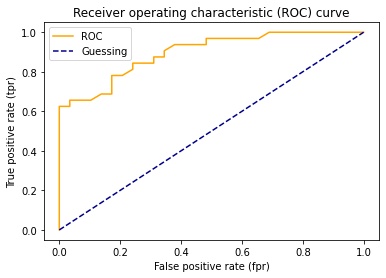

In [93]:
# Create a function for plotting ROC curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr) : 
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) as a model.
    """ 
    # Plot ROC curve 
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    
    # Customize the plot
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Receiver operating characteristic (ROC) curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [94]:
# Let's calculate the under curve score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.896551724137931

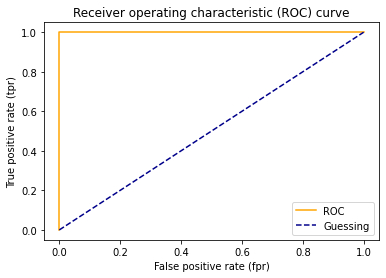

In [95]:
# Plot the perfect ROC curve and AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [96]:
# Calculate the score of the perfect ROC curve
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix** 

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you and idea where the model is getting confused (or getting wrong results)

In [97]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[21,  8],
       [ 5, 27]])

In [98]:
# Visualise confusion matrix with pd.crosstab 
pd.crosstab(y_test,
            y_preds,
            rownames=['Actual labels'],
            colnames=['Predicted labels'])

Predicted labels,0,1
Actual labels,,
0,21,8
1,5,27


<AxesSubplot:>

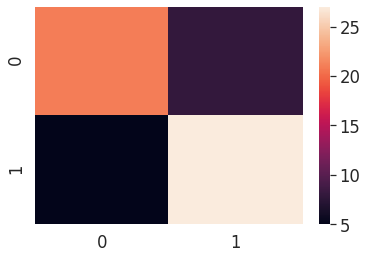

In [99]:
# Now let's make our confusion matrix looks more visual usin' Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat)

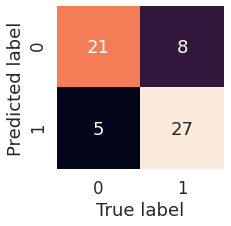

In [100]:
# Make our plot more expressive
def plot_conf_mat(conf_mat) : 
    """ Plot a confusion matrix using Seaborn's heatmap(). """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot= True, # Annotate the boxes with conf_mat info
                     cbar= False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
plot_conf_mat(conf_mat)       

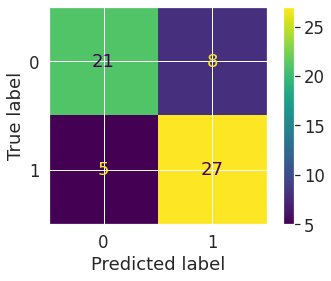

In [101]:
# We can also do it using the funtion sklearn provides
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test);

**Classification repport**

In [102]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76        29
           1       0.77      0.84      0.81        32

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



## To summarize classification metrics : 
* **Accuracy** is a good measure to start with if all classes are balanced (e.g same amount of samples which are labelled with 0 or 1).
* **Precision** and **recall** become more important when classes are imbalanced.
* If flase positive predictions are worse than flase negatives, aim for higher precision.
* if false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall. 

### 4.2.2 Regression model evaluation metrics : 
1. R² (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

## **1- R²** :
What R-squared does : It compares your models predictions to the mean of the targets. Values can range from negative infinity(a very poor model) to 1.
e.g : If all your model does predict is the mean of the targets, it's R² value would be 0.
And if your model perfectly predicts a range of numbers it's R² value would be 1. 

In [103]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(11)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train);

In [104]:
model.score(X_test, y_test)

0.7653647106582748

In [105]:
from sklearn.metrics import r2_score

# Fill in an array with y_test mean 
y_test_mean = np.full(len(y_test), y_test.mean())
y_test.mean(), y_test_mean

(21.995098039215677,
 array([21.99509804, 21.99509804, 21.99509804, 21.99509804, 21.99509804,
        21.99509804, 21.99509804, 21.99509804, 21.99509804, 21.99509804,
        21.99509804, 21.99509804, 21.99509804, 21.99509804, 21.99509804,
        21.99509804, 21.99509804, 21.99509804, 21.99509804, 21.99509804,
        21.99509804, 21.99509804, 21.99509804, 21.99509804, 21.99509804,
        21.99509804, 21.99509804, 21.99509804, 21.99509804, 21.99509804,
        21.99509804, 21.99509804, 21.99509804, 21.99509804, 21.99509804,
        21.99509804, 21.99509804, 21.99509804, 21.99509804, 21.99509804,
        21.99509804, 21.99509804, 21.99509804, 21.99509804, 21.99509804,
        21.99509804, 21.99509804, 21.99509804, 21.99509804, 21.99509804,
        21.99509804, 21.99509804, 21.99509804, 21.99509804, 21.99509804,
        21.99509804, 21.99509804, 21.99509804, 21.99509804, 21.99509804,
        21.99509804, 21.99509804, 21.99509804, 21.99509804, 21.99509804,
        21.99509804, 21.995098

In [106]:
# Model predicting the mean gets a score of 0 
r2_score(y_test, y_test_mean)

# Model predicting correctly the perfect value gets a score of 1 
r2_score(y_test, y_test)


1.0

## **2- Mean absolute error (MAE)**
MAE is the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your model predictions are

In [107]:
# Use the mae calculator
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.7817745098039213

In [108]:
# Let's visualise this value
df = pd.DataFrame(data={'Actual values (A)': y_test,
                        'Predicted values(B)': y_preds,
                        'A - B': abs(y_test - y_preds)})
df


,Actual values (A),Predicted values(B),A - B
53,23.4,21.077,2.323
490,8.1,14.636,6.536
240,22.0,27.153,5.153
375,15.0,34.671,19.671
417,10.4,8.195,2.205
...,...,...,...
285,22.0,23.970,1.970
7,27.1,17.973,9.127
247,20.5,21.371,0.871
357,21.7,20.441,1.259


## **3- Mean squared error (MSE) :**
what mean squared error does : it calculates the differences, sqaure the values and after that calculates the mean of them.

In [109]:
# Use the MSE calculator
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

20.131173107843143

In [110]:
# Calculates the MSE by hand
df = pd.DataFrame({'Actual values (A)' : y_test,
                   'Predicted values (B)' : y_preds,
                   '(A - B)²' : np.square(y_test - y_preds),
                   })

# And now the MSE 
mse = np.mean(df['(A - B)²'])
mse


20.131173107843146

### 4.2.3 Using the ***scoring*** parameter : 

In [111]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Set a random seed
np.random.seed(17)

# Create our samples
X  = heartDisease.drop("target", axis=1)
y = heartDisease.target 

# Set up a classifier 
clf = RandomForestClassifier()
# cv is the number of models that will be used
# The default one that's used is 'accuracy'
# So if we set the scoring on none or accuracy the result we'll always be the same
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
cv_acc


array([0.78688525, 0.8852459 , 0.7704918 , 0.81666667, 0.75      ])

In [112]:
# Calculate the cross-validated accuracy 
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f'The cross-validated accuracy is : {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is : 81.17%


In [113]:
# Calculate the cross-validated precision 
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='precision')
print(f'The cross-validated precision is : {np.mean(cv_acc)*100:.2f}%')

The cross-validated precision is : 82.44%


In [114]:
# Calculate the cross-validated recall 
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='recall')
print(f'The cross-validated recall is : {np.mean(cv_acc)*100:.2f}%')

The cross-validated recall is : 84.85%


In [115]:
# Calculate the cross-validated F1 
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='f1')
print(f'The cross-validated F1 is : {np.mean(cv_acc)*100:.2f}%')

The cross-validated F1 is : 84.51%


## How about a regression model ?


In [116]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(15)
X = boston_df.drop("target", axis=1)
y = boston_df.target

model = RandomForestRegressor()

In [117]:
# By default the scoring parameter will be set to r2
np.random.seed(11)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)
cv_r2

array([0.74302828, 0.85326882, 0.73691386, 0.47261492, 0.27027654])

In [118]:
# R² 
np.random.seed(11)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')
cv_r2

array([0.74302828, 0.85326882, 0.73691386, 0.47261492, 0.27027654])

In [119]:
# Mean absolute error 
np.random.seed(11)
cv_mae = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_mae

array([-2.22493137, -2.61290099, -3.40663366, -3.78383168, -3.29048515])

In [120]:
# Mean squared error 
np.random.seed(11)
cv_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse

array([ -8.87456846, -13.35793064, -21.06983281, -46.25792235,
       -19.40211858])

### 4.3 Using different evaluation metrics as Scikit-learn functions : 
***Classification evaluation models*** 

In [121]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heartDisease.drop("target", axis=1)
y = heartDisease.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier()
clf.fit(X_train, y_train) 

# Make some predictions 
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set :")
print(f"Accuracy : {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision : {precision_score(y_test, y_preds)*100:.2f}%")
print(f"Recall : {recall_score(y_test, y_preds)*100:.2f}%")
print(f"F1 : {f1_score(y_test, y_preds)*100:.2f}%")



Classifier metrics on the test set :
Accuracy : 85.25%
Precision : 84.85%
Recall : 87.50%
F1 : 86.15%


***Regression evaluation models***

In [122]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Set a random seed
np.random.seed(42)

X = boston_df.drop("target", axis=1)
y= boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions using the model 
y_preds = model.predict(X_test)

# Evaluate the regression model
print('Regression model metrics on the test set : ')
print(f'R² score : {r2_score(y_test, y_preds):.2f}')
print(f'Mean absolute error score : {mean_absolute_error(y_test, y_preds):.2f}')
print(f'Mean squared error score : {mean_squared_error(y_test, y_preds):.2f}')

Regression model metrics on the test set : 
R² score : 0.87
Mean absolute error score : 2.14
Mean squared error score : 9.87


## 5. Improving a model : 
* First predictions : Baseline predictions. 
* First model : baseline model.

From a data perspective : 
* Could we collect more data ? (generally, the more data, the better)
* Could we imrove our data

From a model perspective : 
* Is there a better model model we could use ? 
* Could we improve the current model ? 

Hyperparameters vs. Parameters : 
* Parameters : model find these patterns in data 
* Hyperparameters : settings on a model you can adjust to (potentially) improve its ability to find patterns 

**Three ways to adjust hyperparameters :**
1. By hand
2. Randomly with with RandomSearchCV
3. Exhaustively with GridSearchCV**

In [123]:
# How to see the hyperparameters of a model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params() 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand : 
Let's make 3 sets, training, validation and test.

We're going to try and adjust : 
* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [124]:
# Create an evaluation function for our model
def evaluate_preds(y_true, y_preds):
    """ Performs evaluation comparison on y_true labels vs. y_preds labels 
    on a classification model. """

    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"Accuracy": round(accuracy, 2),
                   "Precision": round(precision, 2),
                   "Recall": round(recall, 2),
                   "F1": round(f1, 2)}
    print(f"Accuracy = {accuracy * 100:.2f}%")
    print(f"Precision = {precision *100:.2f}%")
    print(f"Recall = {recall *100 :.2f}%")
    print(f"F1 = {f1 *100:.2f}")
    
    return metric_dict

In [125]:
from sklearn.ensemble import RandomForestClassifier

# Set up a random seed
np.random.seed(11)

# Shuffle the data 
heartDiseaseShuffled = heartDisease.sample(frac=1)

# Split the data into X and y sets 
X = heartDiseaseShuffled.drop("target", axis=1)
y = heartDiseaseShuffled.target

# Split the data into train, validation and test sets
train_split = round(0.7 * len(heartDiseaseShuffled)) # 70% of the data
valid_split = round(train_split + 0.15 * len(heartDiseaseShuffled)) # 15% of the data 
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baselineMetrics = evaluate_preds(y_valid, y_preds)
baselineMetrics

Accuracy = 84.44%
Precision = 82.86%
Recall = 96.67%
F1 = 89.23


{'Accuracy': 0.84, 'Precision': 0.83, 'Recall': 0.97, 'F1': 0.89}

In [126]:
clf2 = RandomForestClassifier(n_estimators=100)
clf2.fit(X_train, y_train)
y_preds = clf2.predict(X_valid)
clf2Metrics = evaluate_preds(y_valid, y_preds)
clf2Metrics


Accuracy = 84.44%
Precision = 84.85%
Recall = 93.33%
F1 = 88.89


{'Accuracy': 0.84, 'Precision': 0.85, 'Recall': 0.93, 'F1': 0.89}

In [127]:
clf3 = RandomForestClassifier(n_estimators=100,
                              max_depth=10)
clf3.fit(X_train, y_train)
y_preds = clf3.predict(X_valid)
baselineMetrics = evaluate_preds(y_valid, y_preds)
baselineMetrics

Accuracy = 82.22%
Precision = 82.35%
Recall = 93.33%
F1 = 87.50


{'Accuracy': 0.82, 'Precision': 0.82, 'Recall': 0.93, 'F1': 0.87}

### 5.2 Tuning hyperparameters with RandomizedSearchCV

In [128]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ['auto', 'sqrt'],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

# Set up a random seed
np.random.seed(11)

# Split into X and y
X = heartDiseaseShuffled.drop("target", axis=1)
y = heartDiseaseShuffled.target 

# Split into train and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instanciate the model 
clf = RandomForestClassifier(n_jobs=1) 
# It's a parameter you use for telling your computer 
# h ow much CPU it should use for this model

# Setup RandomizerdSerchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # Number of models to try
                            cv= 5,
                            verbose=2)
# Fit the RandomizedSerach version of clf
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [129]:
# Let's see the best combination
rs_clf.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 30}

In [130]:
# Let's make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

rs_metrics = evaluate_preds(y_test, rs_y_preds)
rs_metrics

Accuracy = 77.05%
Precision = 83.87%
Recall = 74.29%
F1 = 78.79


{'Accuracy': 0.77, 'Precision': 0.84, 'Recall': 0.74, 'F1': 0.79}

### 5.3 Hyperparameters tuning with GridSearchCV

In [131]:
grid_2 = {"n_estimators": [100, 200, 500],
          "max_depth": [None],
          "max_features": ['auto', 'sqrt'],
          "min_samples_split": [6],
          "min_samples_leaf": [1, 2]}


In [132]:
# Set up a random seed
np.random.seed(11)

# Split into X and y
X = heartDiseaseShuffled.drop("target", axis=1)
y = heartDiseaseShuffled.target

# Split into train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

# Setup GridSerchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2)
# Fit the RandomizedSerach version of clf
gs_clf.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [133]:
# Let's see the best hyperparameters
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

In [134]:
# Evaluate the model 
gs_y_preds = gs_clf.predict(X_test)

# Get the results using our function 
gs_evaluation_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy = 77.05%
Precision = 81.82%
Recall = 77.14%
F1 = 79.41


**Let's compare our different models metrics**

<AxesSubplot:>

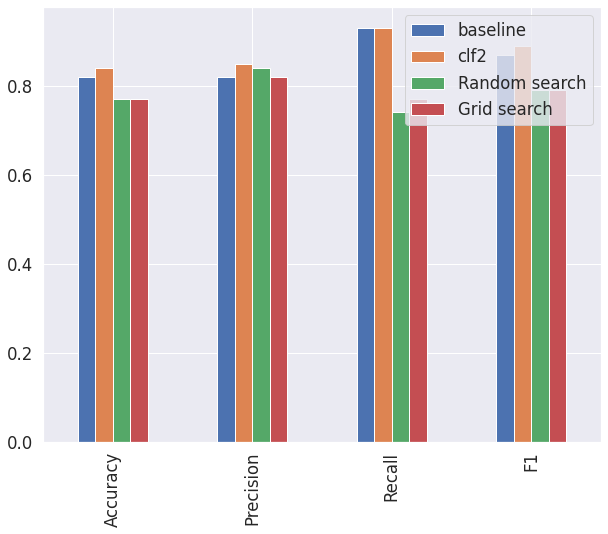

In [135]:
compare_metrics = pd.DataFrame({
    'baseline': baselineMetrics,
    'clf2': clf2Metrics,
    'Random search': rs_metrics,
    'Grid search': gs_evaluation_metrics
})

compare_metrics.plot.bar(figsize=(10, 8))


### 6. Saving and loading trained machine learning models : 
**Two ways to save and load a mechine learning model :**
1. Whith Python's "Pickle" module 
2. With the 'joblib' module

### 6.1 Pickle : 

In [136]:
# Save a model using Pickle
import pickle
pickle.dump(gs_clf, open("gs_random_forest.pkl", "wb"))

# Load a saved model 
loaded_pickle_model = pickle.load(open("gs_random_forest.pkl", "rb"))

In [137]:
# Let's use the loaded model 
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, gs_y_preds)

Accuracy = 77.05%
Precision = 81.82%
Recall = 77.14%
F1 = 79.41


{'Accuracy': 0.77, 'Precision': 0.82, 'Recall': 0.77, 'F1': 0.79}

### 6.2 Joblib : 

In [138]:
from joblib import dump, load

# Save model to file 
dump(gs_clf, filename='gs_random_forest.joblib')

['gs_random_forest.joblib']

In [139]:
# Import a saved joblib model 
loaded_job_model = load(filename='gs_random_forest.joblib')

In [140]:
# Let's use our loaded model 
joblib_y_preds = loaded_job_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Accuracy = 77.05%
Precision = 81.82%
Recall = 77.14%
F1 = 79.41


{'Accuracy': 0.77, 'Precision': 0.82, 'Recall': 0.77, 'F1': 0.79}

## 7. Putting it all together : 

In [146]:
# Importing the data
data = pd.read_csv("/home/rayani00/Bureau/python/MLPerso/zero-to-mastery-ml-master/data/car-sales-extended-missing-data.csv")
data 

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [147]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

**Steps we want to do (all in one cell) :**
1. Fill missing data 
2. Convert data to numbers 
3. Build a model on the data  

In [156]:
# Getting data ready
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

dataPath = '/home/rayani00/Bureau/python/MLPerso/zero-to-mastery-ml-master/data/car-sales-extended-missing-data.csv'

# Setup random seed

# Import the data and drop rows with missing labels
data = pd.read_csv(dataPath)

# We want to predict prices
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
print(f'Score : {model.score(X_test, y_test)}')

Score : 0.3339508763981083


In [157]:
# Use GridSearchCV with our regression Pipeline
pipeGrid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'model__n_estimators': [100, 1000],
    'model__max_depth': [None, 5],
    'model__max_features': ['auto'],
    'model__min_samples_split':[2, 4]
}

gsModel = GridSearchCV(model, pipeGrid, cv=5, verbose=2)
gsModel.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [159]:
print(f"Score : {gsModel.score(X_test, y_test)}")

Score : 0.4207123298538419
